# Forest Fires and the Percolation Threshold

## Authors: 
    Kyle Gendron, Wen Lin

## Introduction

Forest fires across the world are some of the most complicated physical processes in existence.  Their fuel source, the humidity of the locale, the climate of the locale, the type of vegitation (be it deciduous forest, brush, plains, or grasslands), the weather at any given time, the season of the year, or the arbitrary directions of the wind can all affect how a fire progresses.  With this in mind, it suffices to say that it would be very difficult if not nearly impossible to simulate a truly representative forest fire that takes into account all these variables.  

Since 1998, the year of El Nino and the subsequent fires that followed during that season, large-scale and granular data have been demanded on a global scale regarding forest fires worldwide.  While the results from this movement around the globe have had variable results implementing change in policy, it has succeeded in producing a colossal amount of data and statistics on forest fires around the world.  While most of this information is limited to total property loss and acreage destroyed, it can be used to extrapolate the details of a forest fire and what affects it.  One of the largest and most highly-detailed collections of data on forest fires in a given area. 

Even in the most contained environment in which most other variables are negligible, an uncontrolled forest fire can be particularly unpredictable.  One might argue that the simple result is that any adjacent forest will be burned through eventually, given a long enough period to spread without human intervention.  In such a situation, with limited variables interacting with the fire, one could conceive of creating a reasonable scenario in which to iterate over repeatedly -- seeking a trend given some map of forest, brush, and grass.  Such a situation would be extremely special case -- and also equal parts unrealistic, depending on the scale.

This simulation is meant to be that isolated, relatively unrealistic situation.  In order to verify the accuracy of our underlying mechanics and illustrate how our model will work, we will plot three different models of increasing complexity, and display the progress of the fire in a plot of destroyed forest over time, given a lack of animation through this medium.

## Physics and Numerical Method

Given that this simulation is a largely statistical analysis based on mechanics that are implemented using random chance applied to some probability of occurrence, not much of a rigorous background in Physics is required to understand the simulation.  However, a deep understanding of how forest fires spread is required to understand how this simulation falls short, what its meant to illustrate and where it fits into a more realistic scenario.  As a result, it's important to state now that we run on a number of grand assumptions in considering this simulation.

### Setting the Stage

Before we address these assumptions, let's consider some of the variables that affect a forest fire anywhere in the world.  Firstly, one might consider the effect of humans in any capacity -- either as the cause or the end of the fire.  Since this is actually one of the most largely variable factors (in terms of success at reducing damage by the hectare), we will not even consider it in this context -- we will only be considering uncontrolled forest fires.

The next rather large variable that might come to mind is the fuel that the fire will use to keep burning over the course of its life.  While the trees themselves play a role in the majority of the fuel in such a fire, so do other members of a forest.  The presence of undergrowth, brush, and different lengths of grass can also have an impact on the outcome of a forest fire.  Also, ultimately the type of tree can have an impact, too.  However, the presence of brush and undergrowth and the type of tree and either have a squelching or inflating effect on the spread of the fire depending on the climate, season of the year, and the current humidity at the time.  These two general aspects (the contents of the forest and the general climate of the region) interact closely with one another in affecting the movement and spread of the flames.

One particularly arbitrary variable in the climate portion of the equation is wind intensity and direction.  Given it's extremely chaotic behavior and unpredictable nature, this variable is very hard to implement accurately.  With this, we conclude our analysis of the major variables taken into account when looking at uncontrolled forest fires.

### Making Some Assumptions

Here we make some assumptions on which to base the validity of our simulation, in order of largest assumption to smallest:

* The largest assumption we're going to make here is that the arbitrary nature of wind is going to be absorbed into the randomness in our implementation.  We will also ignore the high- and low-pressure systems created from a large, concentrated, uncontrolled, established forest fire.

* The second large assumption we're going to make is that there is no human intervention to speak of in this scenario. While that is the case in widely unpopulated portions of the globe with no fire-control policies in effect, it's a large assumption given the next two assumptions.

* The third largest assumption we're making is the locale of the event: a largely deciduous, thick, dry, and patchy forest in Northern California.  In addition, we are assuming a hot summer in the middle of a drought, low humidity throughout the entirety of the simulation, and no previous recent fires to have eaten away at the brush and undergrowth.  One last caveat, we assume that said drought will not be interrupted at all during this simulation: no rain will extinguish fires.  In addition, there will be little or no biomass in grasslands beyond the overgrowth of grass itself: any fire that consumes the grass will burn out too quickly to spread too far.

* Next, we make some mechanical assumptions about the simulation.  For each frame in the animation we will create, a day will have passed.  Each colored cell in the array represents some square of terrain, dominated primarily by one of three types of vegetation: trees, brush, or grass.  In order to account for a variety of ways in which a fire can put itself out (running out of fuel too quickly, having only moist trees to burn left without significant embers to keep the fire burning), we implement a small chance that some currently-burning fire -- be it established or fresh -- will simply extinguish into ashes before spreading further.  Subsequently, we also assume that the cause of this sudden extinguishing is a sudden lack of fuel due to it all being burned (leaving only a cell of ash).

* Lastly, we make an assumption meant more to clarify than our simulation than liven it: we assume each colored cell is dominated by some type of terrain.  If any particular cell is currently on fire (either established or fresh), it is dominated (more than 50%) by active fires.  If a cell becomes an ash cell, more than 50% of it has been destroyed by the fire directly.

### Numerical Method

Since this simulation is based largely on randomness and probability, I will briefly explain the mechanics and their corresponding calculation.  A more verbose explanation can be found in the Code and Implementation section.

Put simply, each simulation begins with a clear map of terrain, followed by initial fires set.  Each subsequent "day" will represent passing through each cell, and determining whether or not the fire spreads to adjacent cells.  This is determined by generating a random number.  Based on the current state of the cell, a probability value is compared against the resulting random number.  If the random number is less than that probability, the fire spreads.  Lastly, each cells determines if it needs to progress ot the next phase (in the case of a cell that is burning).

Every model will only look up, down, left, and right to find neighbors to set on fire.  Every model will also randomly populate cells with vegetation based on a given probability of population, fed through by the user.

In the first model with only trees, all trees will have an equal chance of being set ablaze by its neighbor, and empty cells will not be able to catch on fire.  

The second model will contain brush, which will be twice as likely to spread fire and catch on fire as compared to trees.

The third model will contain grass, which will be about a quarter as likely to spread as trees and will quickly put itself out.  Also in this model, there will be no empty cells: all cells will be either trees, brush, or grass.

## Verification

In order to verify that our code is functioning in a valid way as compared to the model just presented, we will conduct a series of tests.  Firstly ,we will run the simulation once per model to collect a plot of the destroyed trees over time with a high vegetation cell density each time.  This will demonstrate that our fire is spreading in a reasonable way: more with more brush, a large amount with only trees, and much less with grass introduced.

We will also explicitly display the amount of trees, brush, and grass destroyed in the simulation.

Next, we will generate a 100x100-cell map based on some probability of vegetation (0-100%).  We will take this single map and iterate over it 10 times and take the average total destruction of those ten simulations run over the course of 100 days.  Then we will plot these averaged totals against the probability of vegetation appearing in a cell (for the first model).  For the second model, we will plot forest density (50/50 brush/forest respectively) against total forest destruction.  This will be implemented in the same way as our forest density in model 1, however, if the random chance should fall below this threshold, we will make it a 50/50 chance of it being either brush or forest.  So, this will actually be a forest of equal parts brush and trees, of increasing density.  Lastly, we will plot total forest density against total destruction with grass in our model.

Using these plots, we will discover a fluctuating percolation threshold, which will change based on these different models and their mechanics.  Our goal is ultimately to demonstrate how the introduction of brush into this environment makes for a much more volatile model: our percolation threshold will be much lower and steeper than in the case when there are only mostly trees to fuel a fire.  Since this scenario is based in the most hostile environment for a forest fire to exist in, one can imagine that with more moisture, a forest could easily survive a forest fire, albeit with less brush and undergrowth.  However, with the loss of all that dry, excess biomass, the fire would lose its fuel in the worst case scenario of some long-term drought.

The first model is relatively unrealistic, but meant to demonstrate the form of a standard percolation threshold (also to confirm the validity of this model in the discussion of a percolation threshold altogether).  The second model is meant to illustrate the effect of adding brush into the scenario (a marked increase in the slope of the plot).  The third model is to demonstrate a more realistic scenario (where all cells can be burned through, given a large set of assumptions).

## Results

First we test the mechanics of our simulation with a single test over a single forest with a high tree density, tree/vegetation density, and tree/brush/grass density:

### Demonstrating Mechanics

#### Tree-Only Model (Model 1)

<img src="destroyedPlot.png">


#### Tree and Brush Model (Model 2)

<img src="destroyedPlot2.png">


#### Tree and Brush with Grass Model (Model 3)

<img src="destroyedPlot3.png">

### A Look At Percolation Threshold

#### Tree-Only Model (Model 1)

<img src="percolation.png">

This seems to be a very standard percolation threshold, with the marked increase in losses at about 65% vulnerability density.

#### Tree and Brush Model (Model 2)

<img src="percolation2.png">

While this still appears standard for a percolation threshold, the slope of the increase has become markedly steeper.

#### Tree and Brush with Grass Model (Model 3)

<img src="percolation3.png">

In a more realistic setting, it seems that the percolation threshold, factoring in brush, slopes upward much sooner: our slope increases at a significant rate beginning a about 30% vulnerability density.

## Conclusions

Before moving forward, it is important to again realize the great gaps of realism missed in this simulation, beginning with factoring out the low- and high-pressure systems created by a large-scale forest and wind directing the blaze over time.  These two assumptions alone make this simulation completely useless in predicting the course of a fire over time.  However, just because this simulation isn't a reliable predictor doesn't mean there isn't a valid conclusion to draw from it.  The purpose of this simulation wasn't to track a forest fire in a hyper-realistic scenario, it was to demonstrate the effects of a significant brush concentration in a heavily forested area on uncontrolled fires.  Consider this simulation an isolated experiment, where the forest fire is set, left alone until burned out, and examined after the fact; this experiment shows that there will be more damage done by a forest fire if the density of the forest/brush is too far past a certain amount of density.  Even though the path and changes of the fire would be very different from this simulation outside the limits of our simulation, the underlying principle would remain the same: the more brush in a dense forest, the quicker the spread of the fire -- subsequently, the more destruction.

From the mechanics test plots, it seems that the models are working normally, confirming the accuracy of our percolation threshold.  As predicted, it seems that: 

* With an increased forest density, the fire is more destructive.  
* With an increased forest and brush density, the fire is even more destructive.
* With an increased forest and brush density factoring in grasslands and all other burnable terrain types, the fire is most destructive, barring the remaining grassland cells left over due to the quick self-extinguishing of fires in those regions.

Judging bythe results of this simulation, the regular burning away of brush in forests during more moist and humid seasons will help control forest fires by limiting their movement before detection and after detection.  The less brush that is established in forested areas, the less likely 

Before we end this conclusion, there are some supporting documents that need be addressed.  Supporting and accompanying this simulation are: a set of statistical data, an article on controlling brush in Canada, a world-wide forest fire study, and a basic javascript model.  The statistical data is meant to support the validity of the simulation's mechanics and its results, as they were pulled from the California Department of Forestry and Fire Protection (the state that we assumed this experiment took place in).  The worldwide study white paper is meant to help explain how forest fires work, show the many other different ways that forest fires can behave across awide range of climates, and also brightly highlight how our simulation fails to predict the path of a forest fire.  The javascript simulation is meant to demonstrate how I came up with the idea for the simulation, and openly the simulation I based my scenario off of.  Lastly ,the article is meant to reinforce the fact that keeping brush and general undergrowth is a problem in largely forested areas; it is highly integral in keeping a forest healthy, as counter-intuitive as that may be.  Illustrating that fact, using the conclusions of our simulation coupled with these sources, is the purpose of this experiment; and it seems the experiment was a success.

You can find these documents included in the git repository, for reference.  However, the contents of most of these references are too verbose and complicated to accurately reference, which is why they are included rather than quoted and referenced in piecemeal.  

## Code and Implementation

The below model is heavily influenced by the cell automata simulation that can be found at:

http://www.eddaardvark.co.uk/svg/forest/forest.html#picture

### Arrays, Cells and Object-Oriented Programming

As explained briefly in the Physics and Numerical Method section, this simulation is, at heart, a collection of cells interacting.  These cells are represented as members of a two-dimensional array.  The simplest way to imagine this is as a game board -- with each cell filled with a number.  Each number corresponds to the state of that cell.  For simplicity, we'll ignore the fact that there will be different numbers representing different states between models.  For now, we'll assume that:

* 0 = Grassland
* 1 = Mostly Trees
* 2 = Heavy Brush Concentration with Trees

To illustrate, let's say we have a 5 x 5 game board (or two-dimensional array), filled entirely with trees, grassland, and brush cells.  It would look like:

[1] [0] [0] [0] [1]  
[2] [1] [2] [2] [1]  
[1] [1] [1] [1] [1]  
[0] [1] [2] [1] [1]  
[0] [0] [0] [0] [1]

This is how we represent a forested area in our simulation.  The entire simulation will revolve around this concept.  One other useful concept to keep in mind for this implementation is that of Object-Oriented Programming.  Put simply, it's the creation of "Objects" which represent some entity; these entities keep track of their own data points, hide those data points from direct public access, and interact with other objects (or displays its private data points) through their methods.

In reality, an array isn't quite a game board, it's just a contiguous list of data points in memory somewhere.  While arrays aren't quite Objects, they can help us represent entities in programming: in this case, it will represent our forest in a grid-like fashion.

### Three Different Models

In order to create three different kinds of simulations, we created three different models on which to run my simulation.  In order to avoid the complications in creating a superclass Forest type, with three subclass Forest types to represent these three different simulations, we just created three separate objects instead.  This was done in order to stick closer to the functional side of programming in Python, rather than dip too deeply into Object-Oriented Programming in Python.  While this isn't a very good choice in terms of neat, structured coding, it was a tactical choice in order to expedite our ability to test and modify the simulation on the fly.

From here on out, we will refer to these objects as Models: Model 1 will be the Trees Model, Model 2 will be the Trees and Brush Model, and Model 3 will be the Complete (Trees, Brush, and Grasslands) Model.

### Basic Mechanics

Our simulation runs very linearly: we run through each full simulation in a series of time steps: each time step is one full iteration through the two-dimensional array.  A full iteration simply means visiting each cell in the entire array from beginning to end.  

In each "visit" to a cell, we check to see if the cell is on fire in some way (if a cell is on fire or embers, it will be a certain number, we will check for that, accordingly).  If the cell is on fire, we check the cell above, below, to the left, and to the right to determine whether the fire spreads.  This will be determined by generating some random number between 0.0 and 1.0 (but not including 1.0).  We will keep track of different probabilites in each simulation, we will compare the random value to this probability -- if it's less than that probability, the fire spreads.  

After we determine whether or not the fire spreads, we then determine whether or not to progress the fire from either fresh fire to established fire, established fire to embers, or embers to ash.

In all three simulations, this is how cells changed across all our time steps.

### Differences in Models

There are very slight differences in each model.

* In the first model, there will only be empty cells and tree cells.  Tree cells can catch fire and empty cells cannot.

* In the second model, there will only be empty cells, brush cells, and tree cells.  Tree cells can catch fire, brush cells can catch fire, and empty cells cannot.

* In the third model, there will be grassland cells instead of empty cells, brush cells, and tree cells.  All cells can catch fire, but there are different probabilities for the fire spreading to each of these different cells.

### Methods and Progression

While there are different types of ignition implemented, the only one we will use is the line of ignition.

The init method creates an instance of the Forest object, an instance just means that it is a specific creation, since we can have several Forests active and in existence at any one time.

The genForest method creates a forest grid from scratch.  It also saves a copy of the original forest before ignition.

The initIgnition method ignites cells for the first iteration of the simulation.

The updateNeighbors method checks all adjacent cells to some particular cell and updates the value of that current cell.

The processTimeStep method runs a full iteration of the simulation: if it's the first iteration, it just performs the initIgnition method -- otherwise it just calls the updateNeighbors method for each cell it iterates through.

The getNumStartingTrees gets the number of vegetation cells from that copy made in the genForest method.

The getAsh method collects the number of ash cells from the current map, not the original copy.

The resetMap method resets the map to its original state, by copying the original forest copied in the genForest method over the current state of the map.

The resetDestroyed method resets the array that tracks the number of destroyed cells over the course of a simulation. (This was a response to having trouble with the array being treated as a static value, not resetting in between instantiations)

The setForestDensity method changes the probability (during the genForest method) of a cell being made vegetation, based on some input number.

The conductSim method just repeatedly calls the processTimeStep method based on some input number.  This simulation collects images for animation.

The conductSimQuick method is exactly the same as the conductSim method, but without collecting images for animation.

The animate method just constructs and displays an animation of a given simulation after all calculations have been completed.

All three models contain all these methods and only these methods.

### Running the Simulation

#### Simple plots

In order to create plots of forest destruction over time, we run the regular conductSimQuick method to perform all calculations, and then plot these values against a generated set of time steps t.  This is done for all three models.

#### The Percolation Threshold Plots

In order to calculate enough simulations to create a reliable percolation threshold plot, we start a large for-loop.  For each iteration through the for-loop, we take a forest density (described earlier), starting at 0.01, and create a map with that density.  Once we have that map, we conduct a full simulation over this one map 10 times and average the result -- resetting the map each time we complete a simulation.  We then add that result to an array of values for later plotting.  Each new iteration will add +0.01 to the density.  Moving from 0.01 to 1, we have 100 iterations of 10 simulations -- a total of 1000 trials.  This was done for each of our three models.

####  For Animations

While originally the animations were performed immediately after calculation, requiring a re-calculation each time the program is run, the last version we created is made to save the figure as an .mp4 file for viewing later.  Three trial runs are given with this project, generated using the three code blocks labeled 'animation.'  If you'd like to generate some new animation, just change the Forest construction variables and run the code -- the variable meanings are listed just above the initializations.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random as rand
import matplotlib.animation as animation
from copy import copy, deepcopy
plt.rcParams['animation.ffmpeg_path'] = '/home/administrator/bin/ffmpeg'

In [19]:
#Forest Object

'''
Model: 
model idea referenced: http://www.eddaardvark.co.uk/svg/forest/forest.html#picture

The basis of this model is a linear progression: from forest to freshly lit fire to 
established fire to glowing embers to ash.  Diverting from the previous model to 
observe the amount of damage, we ensure that once a cell is determed to be ash, 
it remains that way.  

Consequently, our linear progression, for simplicity, will be:
0.) Unoccupied
1.) Forest
2.) Freshly-lit fire
3.) Established Fire
4.) Glowing Embers
5.) Ash

Every time a change occurs, we will increment the effected cell.  If we're at ash, we 

skip it.

To construct a forest, we will take in some width, height, and initial ignition 

parameter; these will be:
Line (ignition of some vertical line of cells), 
position (some single start position), 
positions (an array of start positions), 
and rand (random initial ignition locations).

Line will ignore all other inputs except the input for starting line.  Defaults to 0 

with invalid inputs.

Position will ignore all other input except some pair of starting coordinates. 

Defaults to 0,0 with invalid inputs.

Positions will ignore all other inputs except some starting array of coordinates. 

Same as above.

Rand will ignore all input parameters except some input probability, which, if zero 

or not entered, will revert to
0.2, or 20% chance of ignition.

Once initialized, we can access a method to initialize the first bits of fire, update 

invidiaul neighbors, and process 
an entire time step (iterate through the array continguously calling the update 

neighbor method).  In this simulation,
adjacent cells will be only up, down, left, and right.
'''


#define forest model as object
class Forest:
    
    #initialize attributes with default values
    width=50 
    height=50
    map = np.zeros((width, height))
    initMap = np.zeros((width, height)) #used to reset the map after a sim
    currDestroyed = 0 #used to track the current amount of trees destroyed
    destroyed = [] #used to record over time the amount of trees destroyed so far
    
    #plug in some default values to sim mechanics
    igType='rand'
    startLine=0
    startX=0
    startY=0
    startPositions= np.zeros((1,2))
    igProb=0.2

    #always starts at zero
    t = 0
    
    #sim mechanics
    fireToEst = 0.3
    estToEmbers = 0.1
    embersToAsh = 0.07
    spread = 0.1
    forestDensity = 0.5
    
    #constructor -- assumes proper input, no checks
    def __init__(self, w, h, igType, line, x, y, startPos, igProb, fTE, eTE, eTA, spr, forestDensity):
        
        #init map
        self.width = w
        self.height = h
        self.map = np.zeros((w, h))
        
        #set ignition variables
        self.igType = igType
        self.startLine = line
        self.startX = x
        self.startY = y
        self.startPositions = startPos
        self.igProb = igProb
        
        #set sim variables
        self.fireToEst = fTE
        self.estToEmbers = eTE
        self.embersToAsh = eTA
        self.spread = spr
        self.forestDensity = forestDensity
        
        currDestroyed = 0
        destroyed = []
        
        self.genForest()
        
    def genForest(self):
        for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    chance = rand.random()
                    if chance <= self.forestDensity:
                        self.map[i][j] += 1
        
        #grab initial state of map for future use resetting map
        self.initMap = copy(self.map)
        
    #assumes proper input, initializes first fires
    def initIgnition(self):
        if self.igType == 'line':
            for i in range(0, len(self.map)):
                if self.map[i][0] == 1:
                    self.map[i][0] += 1
        elif self.igType == 'position':
            if self.map[self.startX][self.startY] == 1:
                self.map[self.startX][self.startY] += 1
        elif self.igType == 'positions':
            for i in range(0, len(self.startPositions)):
                self.map[self.startPositions[i][0]][self.startPositions[i][1]] += 1
        elif self.igType == 'rand':
            for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    chance = rand.random()
                    if chance <= self.igProb:
                        self.map[i][j] += 1
        else:
            print("Invalid ignition type!")
            sys.exit(0)
        
    #checks four adjacent neighbors, and spreads fire if applicable
    def updateNeighbors(self, row, col):
        
        #if the originating cell is burning in any way
        if self.map[row][col] >= 2 and self.map[row][col] <= 4:
            
            #check cell above
            if row - 1 >= 0 and self.map[row-1][col] == 1:
                chance = rand.random()
                if chance <= self.spread:
                    self.map[row-1][col] = 2

            #check cell below
            if row + 1 < len(self.map) and self.map[row+1][col] == 1:
                chance = rand.random()
                if chance <= self.spread:
                    self.map[row+1][col] = 2

            #check cell to the left
            if col - 1 >= 0 and self.map[row][col-1] == 1:
                chance = rand.random()
                if chance <= self.spread:
                    self.map[row][col-1] = 2

            #check cell to the right
            if col + 1 < len(self.map[0]) and self.map[row][col+1] == 1:
                chance = rand.random()
                if chance <= self.spread:
                    self.map[row][col+1] = 2

        #update the value in the current cell
        #from fire to established fire
        if self.map[row][col] == 2:
            chance = rand.random()
            if chance <= self.fireToEst:
                self.map[row][col] = 3

        elif self.map[row][col] == 3:
            chance = rand.random()
            if chance <= self.estToEmbers:
                self.map[row][col] = 4

        elif self.map[row][col] == 4:
            chance = rand.random()
            if chance <= self.embersToAsh:
                self.map[row][col] = 5
                self.currDestroyed += 1

    #processes time step of sim by iterating through array
    def processTimeStep(self):

        #if we're past initialization,
        if self.t > 0:
            for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    self.updateNeighbors(i, j)
                    self.t += 1
            self.destroyed.append(self.currDestroyed)
        else:
            self.initIgnition()
            self.t += 1
            self.destroyed.append(self.currDestroyed)

    #gets the total number of surviving forests
    def getNumStartingTrees(self):
        total = 0
        for i in range (0, len(self.initMap)):
            for j in range(0, len(self.initMap[0])):
                if self.initMap[i][j] == 1:
                    total += 1
        if total == 0:
            return 1
        else:
            return total

    #gets the total number of surviving forests
    def getAsh(self):
        total = 0
        for i in range (0, len(self.map)):
            for j in range(0, len(self.map[0])):
                if self.map[i][j] == 5:
                    total += 1
        return total
    
    def resetMap(self):
        self.map = copy(self.initMap)
        self.t = 0
        
    def resetDestroyed(self):
        del self.destroyed[:]
        
    def setForestDensity(self, density):
        self.forestDensity = density

    #processes a series of time steps t and produces array of arrays
    #returns array of images of forest, and percDestroyed
    def conductSim(self, t):
        ims = []
        ims.append(copy(self.map))
        for i in range(0, t):
            self.processTimeStep()
            ims.append(copy(self.map))

        percDestroyed = self.getAsh() / self.getNumStartingTrees()

        return (ims, percDestroyed, self.destroyed)
    
    #simulation method used for calculating percolation threshold
    #less memory-intensive, made to be faster
    def conductSimQuick(self, t):
        for i in range(0, t):
            self.processTimeStep()

        percDestroyed = self.getAsh() / self.getNumStartingTrees()

        return (percDestroyed)
    
    #helper method used to animate the results of a simulation
    def animate(self, ims):
        
        # Set up formatting for the movie files
        FFwriter = animation.FFMpegWriter()
        
        ims2 = []
        fig = plt.figure()
        
        #define colormap
        cmap1 = colors.ListedColormap(['white','green', 'yellow', 'orange', 'red', 'black'])
        bounds = [0,1,2,3,4,5,6]
        norm1 = colors.BoundaryNorm(bounds, cmap1.N)
        
        for i in range(0, len(ims)):
            im = plt.imshow(ims[i], interpolation = 'nearest', origin = 'lower', cmap=cmap1, norm=norm1)
            ims2.append([im])
            
        im_ani = animation.ArtistAnimation(fig, ims2, repeat_delay=3000, blit=True)
        im_ani.save('Forest1.mp4', writer = FFwriter, fps=60, extra_args=['-vcodec', 'libx264'])

In [ ]:
#tests
# variable meanings: (self, w, h, igType, line, x, y, startPos, igProb, probof fire turning established, 
#prob established fire becoming embers, prob embers becoming ashes, prob of fire spreading, forestDensity)
f1 = Forest(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.7)
f1.resetDestroyed()
ims, percDestroyed, destroyed = f1.conductSim(150)
t = np.linspace(0,150,150)
plt.plot(t,destroyed)
plt.savefig('destroyedPlot.png')

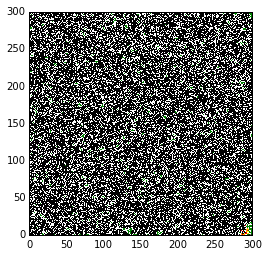

In [24]:
#animation
f = Forest(300, 300, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.7)
f.resetDestroyed()
ims, percDestroyed, destroyed = f.conductSim(400)
t = np.linspace(0,150,150)
f.animate(ims)

In [ ]:
d = 0.01
t = np.linspace(0,100,100)
f = Forest(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, d)
sumDest = 0
sums = []

for i in range(0, 100):
    f.resetDestroyed()
    for j in range(0,10):
        percDestroyed= f.conductSimQuick(150)
        sumDest += percDestroyed
        print('sum ',sumDest,' so far')
        f.resetMap()
        f.resetDestroyed()
    sums.append(sumDest/10)
    print('sums so far ',sums)
    sumDest = 0
    d += 0.01
    print('iteration ',i)
    f = Forest(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, d)
    
plt.plot(t, sums)
plt.savefig('percolation2.png')

In [28]:
#Forest with Brush Object

'''
Model: 
model idea referenced: http://www.eddaardvark.co.uk/svg/forest/forest.html#picture

The basis of this model is a linear progression: from forest to freshly lit fire to 
established fire to glowing embers to ash.  Diverting from the previous model to 

observe the amount of
damage, we ensure that once a cell is determed to be ash, it remains that way.  

Additionally, since we are
not factoring in any sort of regrowth, there will be no shoot or shrub type.

A later version may implement shrubbery in order to demonstrate how (with an 

implemented higher chance 
of ignition with the a larger amount of shrubs in the forest).

Consequently, our linear progression, for simplicity, will be:
0.) Unoccupied
1.) Brush
2.) Forest
3.) Freshly-lit fire
4.) Established Fire
5.) Glowing Embers
6.) Ash

Every time a change occurs, we will increment the effected cell.  If we're at ash, we 

skip it.

To construct a forest, we will take in some width, height, and initial ignition 

parameter; these will be:
Line (ignition of some vertical line of cells), position (some single start 

position), positions (an array of start positions), 
and rand (random initial ignition locations).

Line will ignore all other inputs except the input for starting line.  Defaults to 0 

with invalid inputs.

Position will ignore all other input except some pair of starting coordinates. 

Defaults to 0,0 with invalid inputs.

Positions will ignore all other inputs except some starting array of coordinates. 

Same as above.

Rand will ignore all input parameters except some input probability, which, if zero 

or not entered, will revert to
0.2, or 20% chance of ignition.

Once initialized, we can access a method to initialize the first bits of fire, update 

invidiaul neighbors, and process 
an entire time step (iterate through the array continguously calling the update 
neighbor method).  In this simulation, adjacent cells will be only up, down, left, and right.
'''


#define forest model as object
class ForestWithBrush:
    
    #initialize attributes with default values
    width=50 
    height=50
    map = np.zeros((width, height))
    initMap = np.zeros((width, height)) #used to reset the map after a sim
    currDestroyed = 0 #used to track the current amount of trees destroyed
    destroyed = [] #used to record over time the amount of trees destroyed so far
    
    #plug in some default values to sim mechanics
    igType='rand'
    startLine=0
    startX=0
    startY=0
    startPositions= np.zeros((1,2))
    igProb=0.2

    #always starts at zero
    t = 0
    
    #sim mechanics
    fireToEst = 0.3
    estToEmbers = 0.1
    embersToAsh = 0.07
    spreadToForest = 0.1
    spreadToBrush = 0.2
    forestDensity = 0.5
    
    #constructor -- assumes proper input, no checks
    def __init__(self, w, h, igType, line, x, y, startPos, igProb, fTE, eTE, eTA, sprFor, sprBru, forestDensity):
        
        #init map
        self.width = w
        self.height = h
        self.map = np.zeros((w, h))
        
        #set ignition variables
        self.igType = igType
        self.startLine = line
        self.startX = x
        self.startY = y
        self.startPositions = startPos
        self.igProb = igProb
        
        #set sim variables
        self.fireToEst = fTE
        self.estToEmbers = eTE
        self.embersToAsh = eTA
        self.spreadToForest = sprFor
        self.spreadToBrush = sprBru
        self.forestDensity = forestDensity
        
        currDestroyed = 0
        destroyed = []
        
        self.genForest()
        
    def genForest(self):
        for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    chance = rand.random()
                    if chance <= self.forestDensity:
                        if chance <= (self.forestDensity/2):
                            self.map[i][j] = 1
                        else: 
                            self.map[i][j] = 2
        
        #grab initial state of map for future use resetting map
        self.initMap = copy(self.map)
        
    #assumes proper input, initializes first fires
    def initIgnition(self):
        if self.igType == 'line':
            for i in range(0, len(self.map)):
                if self.map[i][0] == 1 or self.map[i][0] == 2:
                    self.map[i][0] = 3
        elif self.igType == 'position':
            if self.map[self.startX][self.startY] == 1 or self.map[i][0] == 2:
                self.map[self.startX][self.startY] = 3
        elif self.igType == 'positions':
            for i in range(0, len(self.startPositions)):
                self.map[self.startPositions[i][0]][self.startPositions[i][1]] = 3
        elif self.igType == 'rand':
            for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    chance = rand.random()
                    if chance <= self.igProb:
                        self.map[i][j] = 3
        else:
            print("Invalid ignition type!")
            sys.exit(0)
        
    #checks four adjacent neighbors, and spreads fire if applicable
    def updateNeighbors(self, row, col):
        
        #if the originating cell is burning in any way
        if self.map[row][col] >= 3 and self.map[row][col] <= 5:
            
            #for brush
            #check cell above
            if row - 1 >= 0 and self.map[row-1][col] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row-1][col] = 3

            #check cell below
            if row + 1 < len(self.map) and self.map[row+1][col] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row+1][col] = 3

            #check cell to the left
            if col - 1 >= 0 and self.map[row][col-1] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row][col-1] = 3

            #check cell to the right
            if col + 1 < len(self.map[0]) and self.map[row][col+1] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row][col+1] = 3
            
            #for forest
            #check cell above
            if row - 1 >= 0 and self.map[row-1][col] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row-1][col] = 3

            #check cell below
            if row + 1 < len(self.map) and self.map[row+1][col] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row+1][col] = 3

            #check cell to the left
            if col - 1 >= 0 and self.map[row][col-1] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row][col-1] = 3

            #check cell to the right
            if col + 1 < len(self.map[0]) and self.map[row][col+1] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row][col+1] = 3

        #update the value in the current cell
        #from fire to established fire
        if self.map[row][col] == 3:
            chance = rand.random()
            if chance <= self.fireToEst:
                self.map[row][col] = 4

        elif self.map[row][col] == 4:
            chance = rand.random()
            if chance <= self.estToEmbers:
                self.map[row][col] = 5

        elif self.map[row][col] == 5:
            chance = rand.random()
            if chance <= self.embersToAsh:
                self.map[row][col] = 6
                self.currDestroyed += 1

    #processes time step of sim by iterating through array
    def processTimeStep(self):

        #if we're past initialization,
        if self.t > 0:
            for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    self.updateNeighbors(i, j)
                    self.t += 1
            self.destroyed.append(self.currDestroyed)
        else:
            self.initIgnition()
            self.t += 1
            self.destroyed.append(self.currDestroyed)

    #gets the total number of surviving forests
    def getNumStartingVegetation(self):
        total = 0
        for i in range (0, len(self.initMap)):
            for j in range(0, len(self.initMap[0])):
                if self.initMap[i][j] == 1 or self.initMap[i][j] == 2:
                    total += 1
        if total == 0:
            return 1
        else:
            return total

    #gets the total number of surviving forests
    def getAsh(self):
        total = 0
        for i in range (0, len(self.map)):
            for j in range(0, len(self.map[0])):
                if self.map[i][j] == 6:
                    total += 1
        return total
    
    def resetMap(self):
        self.map = copy(self.initMap)
        self.t = 0
        
    def resetDestroyed(self):
        del self.destroyed[:]
        
    def setForestDensity(self, density):
        self.forestDensity = density

    #processes a series of time steps t and produces array of arrays
    #returns array of images of forest, and percDestroyed
    def conductSim(self, t):
        ims = []
        ims.append(copy(self.map))
        for i in range(0, t):
            self.processTimeStep()
            ims.append(copy(self.map))

        percDestroyed = self.getAsh() / self.getNumStartingVegetation()

        return (ims, percDestroyed, self.destroyed)
    
    #simulation method used for calculating percolation threshold
    #less memory-intensive, made to be faster
    def conductSimQuick(self, t):
        for i in range(0, t):
            self.processTimeStep()

        percDestroyed = self.getAsh() / self.getNumStartingVegetation()

        return (percDestroyed)
    
    #helper method used to animate the results of a simulation
    def animate(self, ims):
        
        # Set up formatting for the movie files
        FFwriter = animation.FFMpegWriter()
        
        ims2 = []
        fig = plt.figure()
        
        #define colormap
        cmap1 = colors.ListedColormap(['white','green','darkgreen', 'yellow', 'orange', 'red', 'black'])
        bounds = [0,1,2,3,4,5,6,7]
        norm1 = colors.BoundaryNorm(bounds, cmap1.N)
        
        for i in range(0, len(ims)):
            im = plt.imshow(ims[i], interpolation = 'nearest', origin = 'lower', cmap=cmap1, norm=norm1)
            ims2.append([im])
            
        im_ani = animation.ArtistAnimation(fig, ims2, interval=100, repeat_delay=3000, blit=True)
        im_ani.save('Forest2.mp4', writer = FFwriter, fps=60, extra_args=['-vcodec', 'libx264'])

In [ ]:
#tests
#self, w, h, igType, line, x, y, startPos, igProb, fTE, eTE, eTA, spr, forestDensity
f2 = ForestWithBrush(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, 0.8)
f2.resetDestroyed()
ims, percDestroyed, destroyed = f2.conductSim(150)
t = np.linspace(0,150,150)
plt.plot(t,destroyed)
plt.savefig('destroyedPlot2.png')

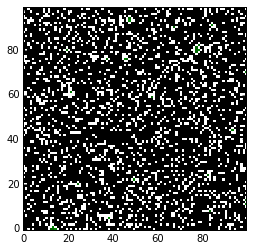

In [30]:
#animation
# variable meanings: (self, w, h, igType, line, x, y, startPos, igProb, probof fire turning established, 
#prob established fire becoming embers, prob embers becoming ashes, prob of fire spreading, forestDensity)
f6 = ForestWithBrush(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, 0.8)
f6.resetDestroyed()
ims, percDestroyed, destroyed = f6.conductSim(400)
t = np.linspace(0,150,150)
f6.animate(ims)

In [ ]:
d = 0.01
t = np.linspace(0,100,100)
f3 = ForestWithBrush(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, d)
sumDest = 0
sums = []

for i in range(0, 100):
    f3.resetDestroyed()
    for j in range(0,10):
        percDestroyed= f3.conductSimQuick(150)
        sumDest += percDestroyed
        print('sum ',sumDest,' so far')
        f3.resetMap()
        f3.resetDestroyed()
    sums.append(sumDest/10)
    print('sums so far ',sums)
    sumDest = 0
    d += 0.01
    print('iteration ',i)
    f3 = ForestWithBrush(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, d)
    
plt.plot(t, sums)
plt.savefig('percolation2.png')

In [31]:
#Forest with Brush and Grass Object

'''
Model: 
model idea referenced: http://www.eddaardvark.co.uk/svg/forest/forest.html#picture

The basis of this model is a linear progression: from forest to freshly lit fire to 
established fire to glowing embers to ash.  Diverting from the previous model to 

observe the amount of
damage, we ensure that once a cell is determed to be ash, it remains that way.  

Additionally, since we are
not factoring in any sort of regrowth, there will be no shoot or shrub type.

A later version may implement shrubbery in order to demonstrate how (with an 

implemented higher chance 
of ignition with the a larger amount of shrubs in the forest).

Consequently, our linear progression, for simplicity, will be:
0.) Grass
1.) Brush
2.) Forest
3.) Freshly-lit fire
4.) Established Fire
5.) Glowing Embers
6.) Ash

Every time a change occurs, we will increment the effected cell.  If we're at ash, we 

skip it.

To construct a forest, we will take in some width, height, and initial ignition 

parameter; these will be:
Line (ignition of some vertical line of cells), position (some single start 

position), positions (an array of start positions), 
and rand (random initial ignition locations).

Line will ignore all other inputs except the input for starting line.  Defaults to 0 

with invalid inputs.

Position will ignore all other input except some pair of starting coordinates. 

Defaults to 0,0 with invalid inputs.

Positions will ignore all other inputs except some starting array of coordinates. 

Same as above.

Rand will ignore all input parameters except some input probability, which, if zero 

or not entered, will revert to
0.2, or 20% chance of ignition.

Once initialized, we can access a method to initialize the first bits of fire, update 

invidiaul neighbors, and process 
an entire time step (iterate through the array continguously calling the update 
neighbor method).  In this simulation, adjacent cells will be only up, down, left, and right.
'''


#define forest model as object
class ForestWithBrushAndGrass:
    
    #initialize attributes with default values
    width=50 
    height=50
    map = np.zeros((width, height))
    initMap = np.zeros((width, height)) #used to reset the map after a sim
    currDestroyed = 0 #used to track the current amount of trees destroyed
    destroyed = [] #used to record over time the amount of trees destroyed so far
    
    #plug in some default values to sim mechanics
    igType='rand'
    startLine=0
    startX=0
    startY=0
    startPositions= np.zeros((1,2))
    igProb=0.2

    #always starts at zero
    t = 0
    
    #sim mechanics
    fireToEst = 0.3
    estToEmbers = 0.1
    embersToAsh = 0.07
    spreadToForest = 0.1
    spreadToBrush = 0.2
    spreadToGrass = 0.05
    forestDensity = 0.5
    
    #constructor -- assumes proper input, no checks
    def __init__(self, w, h, igType, line, x, y, startPos, igProb, fTE, eTE, eTA, sprFor, sprBru, sprGra, forestDensity):
        
        #init map
        self.width = w
        self.height = h
        self.map = np.zeros((w, h))
        
        #set ignition variables
        self.igType = igType
        self.startLine = line
        self.startX = x
        self.startY = y
        self.startPositions = startPos
        self.igProb = igProb
        
        #set sim variables
        self.fireToEst = fTE
        self.estToEmbers = eTE
        self.embersToAsh = eTA
        self.spreadToForest = sprFor
        self.spreadToBrush = sprBru
        self.spreadToGrass = sprGra
        self.forestDensity = forestDensity
        
        currDestroyed = 0
        destroyed = []
        
        self.genForest()
        
    def genForest(self):
        for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    chance = rand.random()
                    if chance <= self.forestDensity:
                        if chance <= (self.forestDensity/2):
                            self.map[i][j] = 1
                        else: 
                            self.map[i][j] = 2
        
        #grab initial state of map for future use resetting map
        self.initMap = copy(self.map)
        
    #assumes proper input, initializes first fires
    def initIgnition(self):
        if self.igType == 'line':
            for i in range(0, len(self.map)):
                    self.map[i][0] = 3
        elif self.igType == 'position':
                self.map[self.startX][self.startY] = 3
        elif self.igType == 'positions':
            for i in range(0, len(self.startPositions)):
                self.map[self.startPositions[i][0]][self.startPositions[i][1]] = 3
        elif self.igType == 'rand':
            for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    chance = rand.random()
                    if chance <= self.igProb:
                        self.map[i][j] = 3
        else:
            print("Invalid ignition type!")
            sys.exit(0)
        
    #checks four adjacent neighbors, and spreads fire if applicable
    def updateNeighbors(self, row, col):
        
        #if the originating cell is burning in any way: spread the fire
        if self.map[row][col] >= 3 and self.map[row][col] <= 5:
            
            #for forest
            #check cell above
            if row - 1 >= 0 and self.map[row-1][col] == 0:
                chance = rand.random()
                if chance <= self.spreadToGrass:
                    self.map[row-1][col] = 3

            #check cell below
            if row + 1 < len(self.map) and self.map[row+1][col] == 0:
                chance = rand.random()
                if chance <= self.spreadToGrass:
                    self.map[row+1][col] = 3

            #check cell to the left
            if col - 1 >= 0 and self.map[row][col-1] == 0:
                chance = rand.random()
                if chance <= self.spreadToGrass:
                    self.map[row][col-1] = 3

            #check cell to the right
            if col + 1 < len(self.map[0]) and self.map[row][col+1] == 0:
                chance = rand.random()
                if chance <= self.spreadToGrass:
                    self.map[row][col+1] = 3
            
            #for brush
            #check cell above
            if row - 1 >= 0 and self.map[row-1][col] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row-1][col] = 3

            #check cell below
            if row + 1 < len(self.map) and self.map[row+1][col] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row+1][col] = 3

            #check cell to the left
            if col - 1 >= 0 and self.map[row][col-1] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row][col-1] = 3

            #check cell to the right
            if col + 1 < len(self.map[0]) and self.map[row][col+1] == 1:
                chance = rand.random()
                if chance <= self.spreadToBrush:
                    self.map[row][col+1] = 3
            
            #for forest
            #check cell above
            if row - 1 >= 0 and self.map[row-1][col] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row-1][col] = 3

            #check cell below
            if row + 1 < len(self.map) and self.map[row+1][col] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row+1][col] = 3

            #check cell to the left
            if col - 1 >= 0 and self.map[row][col-1] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row][col-1] = 3

            #check cell to the right
            if col + 1 < len(self.map[0]) and self.map[row][col+1] == 2:
                chance = rand.random()
                if chance <= self.spreadToForest:
                    self.map[row][col+1] = 3

        #update the value in the current cell
        #from fire to established fire
        if self.map[row][col] == 3:
            
            #if it's grass, it burns fastest
            if self.initMap[row][col] == 0:
                self.map[row][col] = 4
            else:
                chance = rand.random()
                if chance <= self.fireToEst:
                    self.map[row][col] = 4

        #from established to embers
        elif self.map[row][col] == 4:
            
            #if it's grass, it burns fastest
            if self.initMap[row][col] == 0:
                self.map[row][col] = 5
            else:
                chance = rand.random()
                if chance <= self.estToEmbers:
                    self.map[row][col] = 5

        elif self.map[row][col] == 5:
            
            #if it's grass, it burns fastest
            if self.initMap[row][col] == 0:
                self.map[row][col] = 6
            else:
                chance = rand.random()
                if chance <= self.embersToAsh:
                    self.map[row][col] = 6
                    self.currDestroyed += 1

    #processes time step of sim by iterating through array
    def processTimeStep(self):

        #if we're past initialization,
        if self.t > 0:
            for i in range(0, len(self.map)):
                for j in range(0, len(self.map[0])):
                    self.updateNeighbors(i, j)
                    self.t += 1
            self.destroyed.append(self.currDestroyed)
        else:
            self.initIgnition()
            self.t += 1
            self.destroyed.append(self.currDestroyed)

    #gets the total number of surviving forests
    def getNumStartingVegetation(self):
        return (len(self.map) * len(self.map[0]))

    #gets the total number of surviving forests
    def getAsh(self):
        total = 0
        for i in range (0, len(self.map)):
            for j in range(0, len(self.map[0])):
                if self.map[i][j] == 6:
                    total += 1
        print(total)
        return total
    
    def resetMap(self):
        self.map = copy(self.initMap)
        self.t = 0
        
    def resetDestroyed(self):
        del self.destroyed[:]
        
    def setForestDensity(self, density):
        self.forestDensity = density

    #processes a series of time steps t and produces array of arrays
    #returns array of images of forest, and percDestroyed
    def conductSim(self, t):
        ims = []
        ims.append(copy(self.map))
        for i in range(0, t):
            self.processTimeStep()
            ims.append(copy(self.map))

        percDestroyed = self.getAsh() / self.getNumStartingVegetation()

        return (ims, percDestroyed, self.destroyed)
    
    #simulation method used for calculating percolation threshold
    #less memory-intensive, made to be faster
    def conductSimQuick(self, t):
        for i in range(0, t):
            self.processTimeStep()

        percDestroyed = self.getAsh() / self.getNumStartingVegetation()

        return (percDestroyed)
    
    #helper method used to animate the results of a simulation
    def animate(self, ims):
        
        # Set up formatting for the movie files
        FFwriter = animation.FFMpegWriter()
        
        ims2 = []
        fig = plt.figure()
        
        #define colormap
        cmap1 = colors.ListedColormap(['lawngreen','green','darkgreen', 'yellow', 'orange', 'red', 'black'])
        bounds = [0,1,2,3,4,5,6,7]
        norm1 = colors.BoundaryNorm(bounds, cmap1.N)
        
        for i in range(0, len(ims)):
            im = plt.imshow(ims[i], interpolation = 'nearest', origin = 'lower', cmap=cmap1, norm=norm1)
            ims2.append([im])
            
        im_ani = animation.ArtistAnimation(fig, ims2, interval=100, repeat_delay=3000, blit=True)
        im_ani.save('Forest3.mp4', writer = FFwriter, fps=60, extra_args=['-vcodec', 'libx264'])

In [ ]:
#tests
#self, w, h, igType, line, x, y, startPos, igProb, fTE, eTE, eTA, spr, forestDensity
f4 = ForestWithBrushAndGrass(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, 0.05, 0.8)
f4.resetDestroyed()
ims, percDestroyed, destroyed = f4.conductSim(150)
t = np.linspace(0,150,150)
plt.plot(t,destroyed)
plt.savefig('destroyedPlot3.png')

In [ ]:
d = 0.01
t = np.linspace(0,100,100)
f5 = ForestWithBrushAndGrass(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, 0.05, d)
sumDest = 0
sums = []

for i in range(0, 100):
    f5.resetDestroyed()
    for j in range(0,10):
        percDestroyed= f5.conductSimQuick(150)
        sumDest += percDestroyed
        print('sum ',sumDest,' so far')
        f5.resetMap()
        f5.resetDestroyed()
    sums.append(sumDest/10)
    print('sums so far ',sums)
    sumDest = 0
    d += 0.01
    print('iteration ',i)
    f5 = ForestWithBrushAndGrass(100, 100, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, 0.05, d)
    
plt.plot(t, sums)
plt.savefig('percolation3.png')

243482


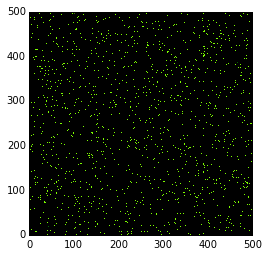

In [32]:
#tests
# variable meanings: (self, w, h, igType, line, x, y, startPos, igProb, probof fire turning established, 
#prob established fire becoming embers, prob embers becoming ashes, prob of fire spreading, 
#prob fire spreading to grass forestDensity)
f6 = ForestWithBrushAndGrass(500, 500, 'line', 0, 0, 0, np.zeros((0,0)), 0.0, 0.3, 0.2, 0.2, 0.4, 0.8, 0.05, 0.8)
f6.resetDestroyed()
ims, percDestroyed, destroyed = f6.conductSim(300)
f6.animate(ims)

# References

1.) California Department of Forestry and Fire Protection, where statistics were pulled from:
http://www.fire.ca.gov/fire_protection/fire_protection_fire_info_redbooks

2.) Model Source upon which this simulation was based:
http://www.eddaardvark.co.uk/svg/forest/forest.html

3.) Forestry Department, part of the Food and Agriculture Organization of the United Nation commission to study worldwide data on forest fires and their handling:
http://www.fire.uni-freiburg.de/programmes/un/fao/Wp55_eng.pdf

4.) Natural Resources of Canada Description of "Prescribed Fires:"
http://www.nrcan.gc.ca/forests/fire-insects-disturbances/fire/13157